In [1]:
# 在计算机的内存中存储多个数值, 且数值从[-5, 5)每间隔0.1取一个数
X = torch.arange(start=-5, end=5, step=0.1)

In [2]:
X.numel()

100

In [3]:
# 将100个神经元设置为计算图中的叶子节点
X.requires_grad = True

In [4]:
# 分别对100个神经元上整合信息的结果进行加工信息, 使用sigmoid函数
sigmoid_y = torch.sigmoid(X)

In [5]:
sigmoid_y.requires_grad

True

Text(0.5, 1.0, 'sigmoid function')

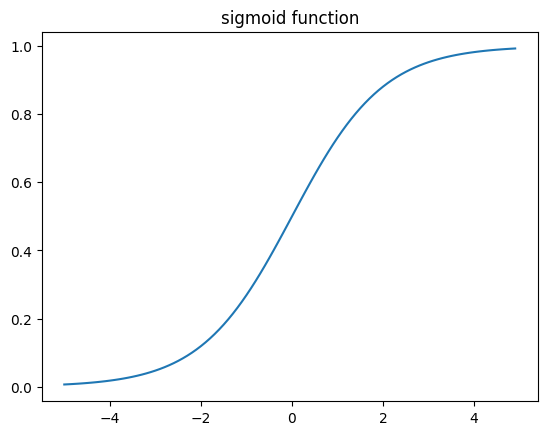

In [6]:
plt.plot(X.detach(), sigmoid_y.detach())
plt.title("sigmoid function")
plt.show()

In [7]:
# 反向传播: 计算computational graph中所有的叶子节点作为自变量的偏导函数表达式
# RuntimeError: grad can be implicitly created only for scalar outputs
# sigmoid_y.backward()

sigmoid_y.sum().backward()

Text(0.5, 1.0, 'sigmoid derivative function')

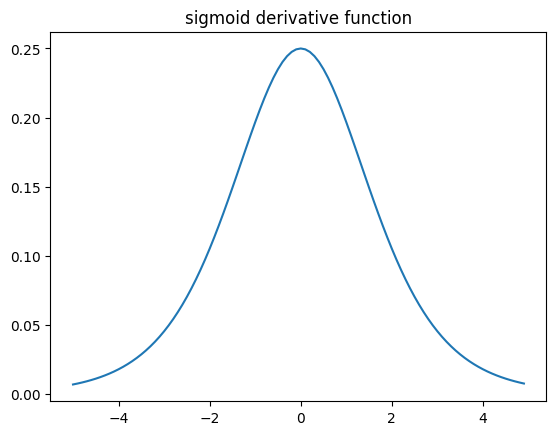

In [8]:
plt.plot(X.detach(), X.grad.detach())
plt.title("sigmoid derivative function")
plt.show()

Text(0.5, 1.0, 'sigmoid derivative function')

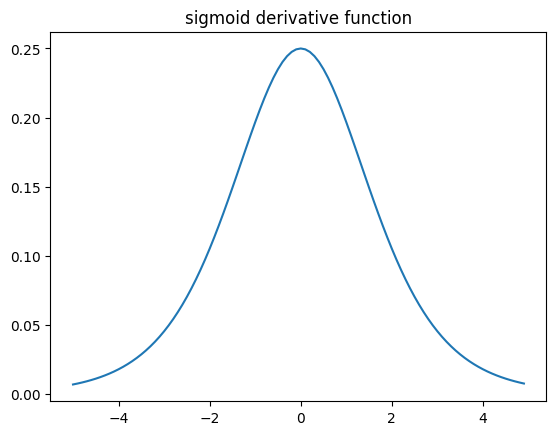

In [9]:
plt.plot(X.detach(), X.grad.detach())
plt.title("sigmoid derivative function")
plt.show()

假设有两个特征变量x1和x2以及标签y之间的自然规律因果关系为: $y=2x_1^2-x_2^2$

In [10]:
torch.manual_seed(55)

X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [87]:
torch.manual_seed(55)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetSigmoid3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetSigmoid3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat_1 = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma_1 = torch.sigmoid(z_hat_1)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat_2 = self.hidden2_linear(sigma_1)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma_2 = torch.sigmoid(z_hat_2)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat_3 = self.hidden3_linear(sigma_2)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma_3 = torch.sigmoid(z_hat_3)

        # 隐藏层第三层 -> 输出层
        z_hat_output = self.output_linear(sigma_3)
        return z_hat_output

net_sigmoid3 = GeoffNetSigmoid3()

In [12]:
# 一次性获取深度神经网络模型的全部参数
params_1 = list(net_sigmoid3.parameters())
params_1

[Parameter containing:
 tensor([[ 0.4748,  0.6191],
         [ 0.3449,  0.0954],
         [ 0.5207, -0.0333],
         [-0.5858,  0.3876]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3334,  0.2835,  0.0216,  0.3003],
         [ 0.2370, -0.1876, -0.1070, -0.1870],
         [-0.3343,  0.3543,  0.0834,  0.0361],
         [-0.1604, -0.2227, -0.2121, -0.3580]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0896, -0.1667, -0.4621,  0.3650], requires_grad=True),
 Parameter containing:
 tensor([[-0.1834,  0.0783, -0.3333,  0.0595],
         [-0.3064,  0.0655,  0.4738,  0.3782],
         [ 0.1017, -0.3961,  0.2762,  0.0858],
         [-0.2640, -0.3715,  0.3696, -0.1594]], requires_grad=True),
 Parameter containing:
 tensor([0.4810, 0.2909, 0.4879, 0.0625], requires_grad=True),
 Parameter containing:
 tensor([[-0.0475, -0.3775, -0.4454, -0.0865]], requires_grad=True),
 Parameter cont

In [13]:
f = torch.tensor([[1., 2]], dtype=torch.float32)
f

tensor([[1., 2.]])

In [14]:
net_sigmoid3(f)

tensor([[-0.6304]], grad_fn=<AddmmBackward0>)

In [15]:
net_sigmoid3.modules()

<generator object Module.modules at 0x122a300b0>

In [16]:
list(net_sigmoid3.modules())

[GeoffNetSigmoid3(
   (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
   (hidden2_linear): Linear(in_features=4, out_features=4, bias=True)
   (hidden3_linear): Linear(in_features=4, out_features=4, bias=True)
   (output_linear): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [17]:
# 获取模型中指定的层
list(net_sigmoid3.modules())[1]

Linear(in_features=2, out_features=4, bias=True)

In [18]:
# 计算模型的第一层整合信息和加工信息的结果
list(net_sigmoid3.modules())[1](f)

tensor([[ 2.3744,  0.0936, -0.1125, -0.4314]], grad_fn=<AddmmBackward0>)

In [19]:
params_1

[Parameter containing:
 tensor([[ 0.4748,  0.6191],
         [ 0.3449,  0.0954],
         [ 0.5207, -0.0333],
         [-0.5858,  0.3876]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3334,  0.2835,  0.0216,  0.3003],
         [ 0.2370, -0.1876, -0.1070, -0.1870],
         [-0.3343,  0.3543,  0.0834,  0.0361],
         [-0.1604, -0.2227, -0.2121, -0.3580]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0896, -0.1667, -0.4621,  0.3650], requires_grad=True),
 Parameter containing:
 tensor([[-0.1834,  0.0783, -0.3333,  0.0595],
         [-0.3064,  0.0655,  0.4738,  0.3782],
         [ 0.1017, -0.3961,  0.2762,  0.0858],
         [-0.2640, -0.3715,  0.3696, -0.1594]], requires_grad=True),
 Parameter containing:
 tensor([0.4810, 0.2909, 0.4879, 0.0625], requires_grad=True),
 Parameter containing:
 tensor([[-0.0475, -0.3775, -0.4454, -0.0865]], requires_grad=True),
 Parameter cont

In [20]:
# 使用张量的计算来手动完成深度神经网络模型在第一层上整合信息和加工信息的结果
torch.mm(f, params_1[0].t()).shape

torch.Size([1, 4])

In [21]:
torch.mm(f, params_1[0].t()) + params_1[1]

tensor([[ 2.3744,  0.0936, -0.1125, -0.4314]], grad_fn=<AddBackward0>)

In [22]:
params_1[1].shape

torch.Size([4])

In [23]:
params_1[1].t().shape

torch.Size([4])

In [24]:
m1 = list(net_sigmoid3.modules())
m1

[GeoffNetSigmoid3(
   (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
   (hidden2_linear): Linear(in_features=4, out_features=4, bias=True)
   (hidden3_linear): Linear(in_features=4, out_features=4, bias=True)
   (output_linear): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [25]:
m1[0]

GeoffNetSigmoid3(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_linear): Linear(in_features=4, out_features=4, bias=True)
  (hidden3_linear): Linear(in_features=4, out_features=4, bias=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [26]:
net_sigmoid3

GeoffNetSigmoid3(
  (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden2_linear): Linear(in_features=4, out_features=4, bias=True)
  (hidden3_linear): Linear(in_features=4, out_features=4, bias=True)
  (output_linear): Linear(in_features=4, out_features=1, bias=True)
)

In [27]:
list(m1[0].parameters())

[Parameter containing:
 tensor([[ 0.4748,  0.6191],
         [ 0.3449,  0.0954],
         [ 0.5207, -0.0333],
         [-0.5858,  0.3876]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3334,  0.2835,  0.0216,  0.3003],
         [ 0.2370, -0.1876, -0.1070, -0.1870],
         [-0.3343,  0.3543,  0.0834,  0.0361],
         [-0.1604, -0.2227, -0.2121, -0.3580]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0896, -0.1667, -0.4621,  0.3650], requires_grad=True),
 Parameter containing:
 tensor([[-0.1834,  0.0783, -0.3333,  0.0595],
         [-0.3064,  0.0655,  0.4738,  0.3782],
         [ 0.1017, -0.3961,  0.2762,  0.0858],
         [-0.2640, -0.3715,  0.3696, -0.1594]], requires_grad=True),
 Parameter containing:
 tensor([0.4810, 0.2909, 0.4879, 0.0625], requires_grad=True),
 Parameter containing:
 tensor([[-0.0475, -0.3775, -0.4454, -0.0865]], requires_grad=True),
 Parameter cont

In [28]:
m1[1]

Linear(in_features=2, out_features=4, bias=True)

In [29]:
# 单独获取深度神经网络模型的某一层上的全部参数
list(m1[1].parameters())

[Parameter containing:
 tensor([[ 0.4748,  0.6191],
         [ 0.3449,  0.0954],
         [ 0.5207, -0.0333],
         [-0.5858,  0.3876]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True)]

In [30]:
# 单独获取深度神经网络模型的某一层上的连接权重参数
m1[1].weight

Parameter containing:
tensor([[ 0.4748,  0.6191],
        [ 0.3449,  0.0954],
        [ 0.5207, -0.0333],
        [-0.5858,  0.3876]], requires_grad=True)

In [31]:
# 单独获取深度神经网络模型的某一层上的偏置值参数
m1[1].bias

Parameter containing:
tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True)

In [32]:
m1[0].bias

AttributeError: 'GeoffNetSigmoid3' object has no attribute 'bias'

In [33]:
# 计算某一层上整合信息的结果. e.g. 输出层->隐藏层第一层
m1[1](f)

tensor([[ 2.3744,  0.0936, -0.1125, -0.4314]], grad_fn=<AddmmBackward0>)

In [34]:
net_sigmoid3(f)[1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [48]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.weight)

Parameter containing:
tensor([[ 0.4748,  0.6191],
        [ 0.3449,  0.0954],
        [ 0.5207, -0.0333],
        [-0.5858,  0.3876]], requires_grad=True)
Parameter containing:
tensor([[ 0.3334,  0.2835,  0.0216,  0.3003],
        [ 0.2370, -0.1876, -0.1070, -0.1870],
        [-0.3343,  0.3543,  0.0834,  0.0361],
        [-0.1604, -0.2227, -0.2121, -0.3580]], requires_grad=True)
Parameter containing:
tensor([[-0.1834,  0.0783, -0.3333,  0.0595],
        [-0.3064,  0.0655,  0.4738,  0.3782],
        [ 0.1017, -0.3961,  0.2762,  0.0858],
        [-0.2640, -0.3715,  0.3696, -0.1594]], requires_grad=True)
Parameter containing:
tensor([[-0.0475, -0.3775, -0.4454, -0.0865]], requires_grad=True)


In [49]:
type(list(net_sigmoid3.modules())[0])

__main__.GeoffNetSigmoid3

In [50]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.bias)

Parameter containing:
tensor([ 0.6614, -0.4421, -0.5666, -0.6207], requires_grad=True)
Parameter containing:
tensor([ 0.0896, -0.1667, -0.4621,  0.3650], requires_grad=True)
Parameter containing:
tensor([0.4810, 0.2909, 0.4879, 0.0625], requires_grad=True)
Parameter containing:
tensor([-0.0533], requires_grad=True)


In [51]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.weight.grad)

None
None
None
None


In [52]:
# 根据搭建的训练流程, 训练深度神经网络模型
fit(batched_dataset=dataset_train, n_epochs=5, model=net_sigmoid3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_sigmoid3.parameters(), lr=0.03), task="reg")

##### 对比模型训练前后的参数

In [53]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.weight)

Parameter containing:
tensor([[ 0.4747,  0.6163],
        [ 0.3408,  0.0953],
        [ 0.5212, -0.0333],
        [-0.5850,  0.3892]], requires_grad=True)
Parameter containing:
tensor([[ 0.3358,  0.2823,  0.0161,  0.3072],
        [ 0.2443, -0.1845, -0.1061, -0.1795],
        [-0.3469,  0.3465,  0.0757,  0.0278],
        [-0.1671, -0.2268, -0.2160, -0.3626]], requires_grad=True)
Parameter containing:
tensor([[-0.2079,  0.0548, -0.3488,  0.0275],
        [-0.3736,  0.0170,  0.4340,  0.3252],
        [ 0.0262, -0.4495,  0.2318,  0.0287],
        [-0.2899, -0.3939,  0.3537, -0.1879]], requires_grad=True)
Parameter containing:
tensor([[0.3429, 0.0522, 0.0066, 0.2280]], requires_grad=True)


In [46]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.weight.grad)

tensor([[ 0.0031, -0.0012],
        [ 0.0025, -0.0009],
        [-0.0013,  0.0005],
        [ 0.0009, -0.0005]])
tensor([[ 0.0160,  0.0121,  0.0147, -0.0007],
        [ 0.0092,  0.0069,  0.0084, -0.0005],
        [ 0.0034,  0.0026,  0.0031, -0.0002],
        [ 0.0045,  0.0034,  0.0041, -0.0002]])
tensor([[-0.1093, -0.0810, -0.0644, -0.0834],
        [-0.0116, -0.0086, -0.0068, -0.0089],
        [-0.0022, -0.0016, -0.0013, -0.0016],
        [-0.0722, -0.0535, -0.0426, -0.0551]])
tensor([[-1.1472, -1.1813, -1.1816, -0.8803]])


In [68]:
for layer in net_sigmoid3.modules():
    if isinstance(layer, nn.Linear):
        print(layer.bias)

Parameter containing:
tensor([ 0.6653, -0.4423, -0.5669, -0.6186], requires_grad=True)
Parameter containing:
tensor([ 0.1011, -0.1523, -0.4812,  0.3548], requires_grad=True)
Parameter containing:
tensor([0.4320, 0.1837, 0.3694, 0.0149], requires_grad=True)
Parameter containing:
tensor([0.6744], requires_grad=True)


In [42]:
def fit(batched_dataset, n_epochs, model, criterion, optimizer, task="reg"):
        """让模型拟合数据, 在训练过程中更新模型的参数, 使得损失函数值减小, 尽可能最小
        @param n_epochs: 对于一个完整的数据集进行学习的遍数
        @param batched_dataset: 将一个完整的数据集按照指定的样本容量划分为若干个互不相交的子集
        @param model: 模型
        @param criterion: 损失函数
        @param optimizer: 优化器

        @return: 完成训练流程的模型(不一定是性能最好的模型)
        """
        for i_epoch in range(n_epochs):
            for (i_X, i_y) in batched_dataset:
                # 1.前向传播, 计算以当前的模型参数对该批次的数据进行学习, 模型的预测输出标记
                z_hat = model.forward(i_X)
                # 2.计算损失, 计算模型的预测输出标记与真实标签之间的误差, 构建完整的计算图
                if task == "clf":
                    i_y = i_y.flatten().long()

                # 5.清空梯度信息
                optimizer.zero_grad()
                loss = criterion(z_hat, i_y)
                # 3.反向传播, 计算以当前的模型参数对应的偏导函数表达式和值, 以确定各个模型的参数在对应维度上应该向哪个方向进行更新(该维度所在的正方向or负方向)
                loss.backward()
                # 4.更新模型的参数, 优化器根据梯度信息, 计算当前的模型参数在各个维度的已知方向上应该更新的数值
                optimizer.step()

In [60]:
# 加载绘图模块seaborn
import seaborn as sns

# 在计算机的内存中逐个存储多个数值 => 选择列表数据结构
gradients = []

for i, layer in enumerate(layers):
    gradients_x = layer.weight.grad.detach().reshape(-1, 1).numpy()
    gradients_y = np.full_like(gradients_x, i)
    gradients_all = np.concatenate((gradients_x, gradients_y), 1)
    gradients.append(gradients_all)

In [54]:
# 获取已经完成训练的模型以及模型的各个层
model_and_layers = list(net_sigmoid3.modules())
model_and_layers

[GeoffNetSigmoid3(
   (hidden1_linear): Linear(in_features=2, out_features=4, bias=True)
   (hidden2_linear): Linear(in_features=4, out_features=4, bias=True)
   (hidden3_linear): Linear(in_features=4, out_features=4, bias=True)
   (output_linear): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [55]:
# 只提取已经完成训练的模型的各个层
layers = list(net_sigmoid3.modules())[1:]
layers

[Linear(in_features=2, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=4, bias=True),
 Linear(in_features=4, out_features=1, bias=True)]

In [56]:
# 获取已经完成训练的模型的隐藏层第一层
hidden1_linear = layers[0]
# 获取该层上各个模型的参数的梯度信息
hidden1_linear.weight.grad

tensor([[ 3.9444e-05,  5.9462e-04],
        [ 8.7759e-04,  1.3327e-04],
        [-2.6596e-04, -4.6583e-05],
        [ 4.0209e-04,  2.8438e-05]])

In [57]:
hidden1_linear.weight.grad.shape

torch.Size([4, 2])

In [58]:
hidden1_linear.weight.grad.reshape(-1, 1).shape

torch.Size([8, 1])

In [59]:
hidden1_linear.weight.grad.reshape(-1, 1).numpy()

array([[ 3.9443927e-05],
       [ 5.9462461e-04],
       [ 8.7759201e-04],
       [ 1.3327441e-04],
       [-2.6596294e-04],
       [-4.6582947e-05],
       [ 4.0209110e-04],
       [ 2.8438080e-05]], dtype=float32)

In [61]:
gradients

[array([[ 3.9443927e-05,  0.0000000e+00],
        [ 5.9462461e-04,  0.0000000e+00],
        [ 8.7759201e-04,  0.0000000e+00],
        [ 1.3327441e-04,  0.0000000e+00],
        [-2.6596294e-04,  0.0000000e+00],
        [-4.6582947e-05,  0.0000000e+00],
        [ 4.0209110e-04,  0.0000000e+00],
        [ 2.8438080e-05,  0.0000000e+00]], dtype=float32),
 array([[ 3.8280850e-04,  1.0000000e+00],
        [ 6.8554748e-04,  1.0000000e+00],
        [ 1.5081698e-03,  1.0000000e+00],
        [-2.3539418e-03,  1.0000000e+00],
        [ 1.6409089e-04,  1.0000000e+00],
        [ 3.7346547e-04,  1.0000000e+00],
        [ 8.1464113e-04,  1.0000000e+00],
        [-1.2631274e-03,  1.0000000e+00],
        [ 3.6354759e-05,  1.0000000e+00],
        [ 6.6924724e-05,  1.0000000e+00],
        [ 1.4138743e-04,  1.0000000e+00],
        [-2.1150164e-04,  1.0000000e+00],
        [ 3.5078847e-05,  1.0000000e+00],
        [ 7.2504685e-05,  1.0000000e+00],
        [ 1.5815371e-04,  1.0000000e+00],
        [-2.44362

In [62]:
gradients_row = np.concatenate(gradients, 0)
gradients_row

array([[ 3.9443927e-05,  0.0000000e+00],
       [ 5.9462461e-04,  0.0000000e+00],
       [ 8.7759201e-04,  0.0000000e+00],
       [ 1.3327441e-04,  0.0000000e+00],
       [-2.6596294e-04,  0.0000000e+00],
       [-4.6582947e-05,  0.0000000e+00],
       [ 4.0209110e-04,  0.0000000e+00],
       [ 2.8438080e-05,  0.0000000e+00],
       [ 3.8280850e-04,  1.0000000e+00],
       [ 6.8554748e-04,  1.0000000e+00],
       [ 1.5081698e-03,  1.0000000e+00],
       [-2.3539418e-03,  1.0000000e+00],
       [ 1.6409089e-04,  1.0000000e+00],
       [ 3.7346547e-04,  1.0000000e+00],
       [ 8.1464113e-04,  1.0000000e+00],
       [-1.2631274e-03,  1.0000000e+00],
       [ 3.6354759e-05,  1.0000000e+00],
       [ 6.6924724e-05,  1.0000000e+00],
       [ 1.4138743e-04,  1.0000000e+00],
       [-2.1150164e-04,  1.0000000e+00],
       [ 3.5078847e-05,  1.0000000e+00],
       [ 7.2504685e-05,  1.0000000e+00],
       [ 1.5815371e-04,  1.0000000e+00],
       [-2.4436240e-04,  1.0000000e+00],
       [ 1.13127

In [63]:
gradients_row[:, 0]

array([ 3.9443927e-05,  5.9462461e-04,  8.7759201e-04,  1.3327441e-04,
       -2.6596294e-04, -4.6582947e-05,  4.0209110e-04,  2.8438080e-05,
        3.8280850e-04,  6.8554748e-04,  1.5081698e-03, -2.3539418e-03,
        1.6409089e-04,  3.7346547e-04,  8.1464113e-04, -1.2631274e-03,
        3.6354759e-05,  6.6924724e-05,  1.4138743e-04, -2.1150164e-04,
        3.5078847e-05,  7.2504685e-05,  1.5815371e-04, -2.4436240e-04,
        1.1312790e-02,  8.6057000e-03,  7.1318559e-03,  1.0824423e-02,
        1.8122355e-03,  1.3770480e-03,  1.1393582e-03,  1.7305044e-03,
        3.4096930e-04,  2.5929289e-04,  2.1482084e-04,  3.2602146e-04,
        7.4577555e-03,  5.6767762e-03,  4.7084149e-03,  7.1426369e-03,
        1.2840354e-01,  1.3321035e-01,  1.3186245e-01,  9.8343559e-02],
      dtype=float32)

[Text(0.5, 0, '#layer'), Text(0.5, 1.0, 'gradients')]

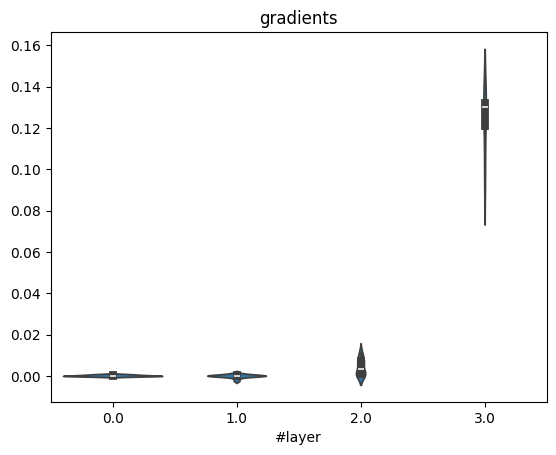

In [64]:
ax = sns.violinplot(y=gradients_row[:, 0], x=gradients_row[:, 1])
ax.set(xlabel="#layer", title="gradients")

In [66]:
# violin plot绘制过程中需要使用的数据
vp = []

for i, layer in enumerate(layers):
    # 提取当前层的所有的连接权重参数
    vp_x = layer.weight.detach().reshape(-1, 1).numpy()
    vp_y = np.full_like(vp_x, i)
    # 拼接成为一个数据框
    vp_df = np.concatenate((vp_x, vp_y), 1)
    vp.append(vp_df)

vp

[array([[ 0.47466385,  0.        ],
        [ 0.616251  ,  0.        ],
        [ 0.3408036 ,  0.        ],
        [ 0.09526129,  0.        ],
        [ 0.5211813 ,  0.        ],
        [-0.03333008,  0.        ],
        [-0.58501196,  0.        ],
        [ 0.3891739 ,  0.        ]], dtype=float32),
 array([[ 0.33578676,  1.        ],
        [ 0.28232348,  1.        ],
        [ 0.01611268,  1.        ],
        [ 0.30715   ,  1.        ],
        [ 0.24433416,  1.        ],
        [-0.18448234,  1.        ],
        [-0.10612099,  1.        ],
        [-0.1794599 ,  1.        ],
        [-0.3469158 ,  1.        ],
        [ 0.34649342,  1.        ],
        [ 0.07573081,  1.        ],
        [ 0.0277701 ,  1.        ],
        [-0.16708995,  1.        ],
        [-0.22677074,  1.        ],
        [-0.21599884,  1.        ],
        [-0.36263365,  1.        ]], dtype=float32),
 array([[-0.20794639,  2.        ],
        [ 0.05481025,  2.        ],
        [-0.34877473,  2.     

[Text(0.5, 0, '#layer'), Text(0.5, 1.0, 'weights')]

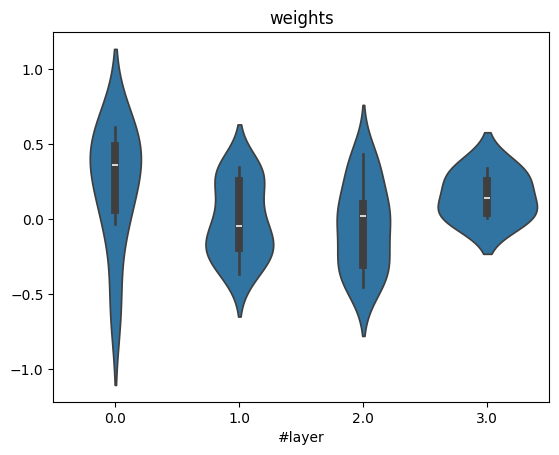

In [67]:
vp_r = np.concatenate(vp, 0)

ax = sns.violinplot(x=vp_r[:, 1], y=vp_r[:, 0])
ax.set(xlabel="#layer", title="weights")

In [83]:
def plot_violin_param(model, param="grad"):
    """绘制模型中的各个层上的指定参数的小提琴分布图
    @param model: 模型
    @param param: 指定参数的名称. e.g. "weight" "grad"(默认值) "bias"
    """
    # 在计算机的内存中逐个存储多个数值 => 选择列表数据结构
    vp = []
    # 获取完整的模型和单独的层, 然后仅保留单独的层
    layers = list(model.modules())[1:]
    for i, layer in enumerate(layers):
        # 获取当前层的指定参数. param有三种可能的取值
        if param == "grad":
            vp_param = layer.weight.grad.detach().reshape(-1, 1).numpy()
        elif param == "weight":
            vp_param = layer.weight.detach().reshape(-1, 1).numpy()
        else:  # param == bias
            vp_param = layer.bias.detach().reshape(-1, 1).numpy()
        
        # 获取当前层的索引
        vp_index = np.full_like(vp_param, i+1)
        vp_i_layer = np.concatenate((vp_param, vp_index), 1)
        vp.append(vp_i_layer)
        
    vp = np.concatenate((vp), 0)
    # 绘制小提琴图
    ax = sns.violinplot(x=vp[:, 1], y=vp[:, 0])
    ax.set(xlabel="#hidden layer", title=param)

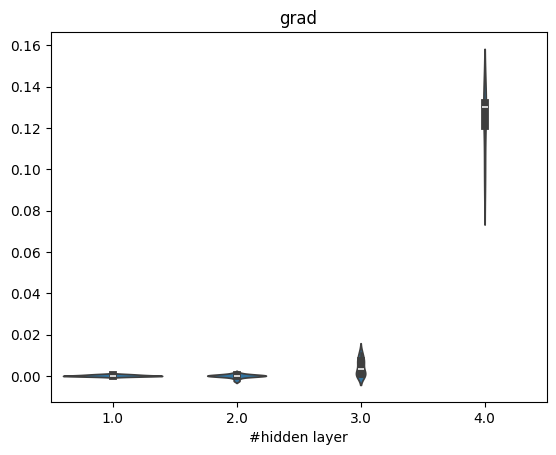

In [84]:
plot_violin_param(model=net_sigmoid3, param="grad")

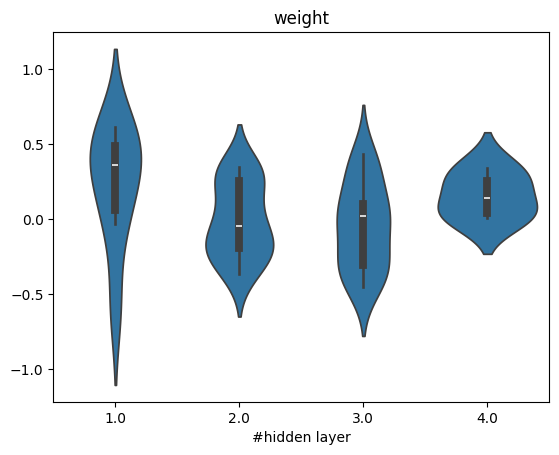

In [85]:
plot_violin_param(model=net_sigmoid3, param="weight")

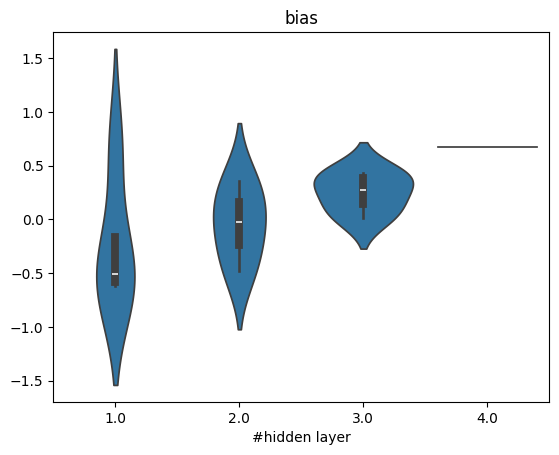

In [86]:
plot_violin_param(model=net_sigmoid3, param="bias")

In [88]:
# 根据搭建的训练流程, 训练深度神经网络模型
fit(batched_dataset=dataset_train, n_epochs=20, model=net_sigmoid3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_sigmoid3.parameters(), lr=0.03), task="reg")

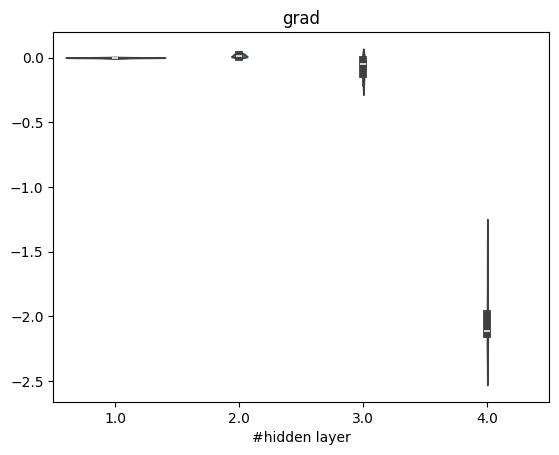

In [89]:
plot_violin_param(model=net_sigmoid3, param="grad")

In [90]:
# 在计算机的内存中一次性存储多个数值. 数值取值具有规律, 从[-5, 5)每间隔0.1取一个数
x = torch.arange(start=-5, end=5, step=0.1)
x.requires_grad = True

In [91]:
x

tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
        -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8

假设自变量x和因变量y之间的因果关系是: $y = \tanh(x)$

In [92]:
y = torch.tanh(x)
y

tensor([-9.9991e-01, -9.9989e-01, -9.9986e-01, -9.9983e-01, -9.9980e-01,
        -9.9975e-01, -9.9970e-01, -9.9963e-01, -9.9955e-01, -9.9945e-01,
        -9.9933e-01, -9.9918e-01, -9.9900e-01, -9.9878e-01, -9.9851e-01,
        -9.9818e-01, -9.9777e-01, -9.9728e-01, -9.9668e-01, -9.9595e-01,
        -9.9505e-01, -9.9396e-01, -9.9263e-01, -9.9101e-01, -9.8903e-01,
        -9.8661e-01, -9.8367e-01, -9.8010e-01, -9.7574e-01, -9.7045e-01,
        -9.6403e-01, -9.5624e-01, -9.4681e-01, -9.3541e-01, -9.2167e-01,
        -9.0515e-01, -8.8535e-01, -8.6172e-01, -8.3365e-01, -8.0050e-01,
        -7.6159e-01, -7.1630e-01, -6.6404e-01, -6.0437e-01, -5.3705e-01,
        -4.6212e-01, -3.7995e-01, -2.9131e-01, -1.9738e-01, -9.9668e-02,
        -2.9802e-09,  9.9668e-02,  1.9738e-01,  2.9131e-01,  3.7995e-01,
         4.6212e-01,  5.3705e-01,  6.0437e-01,  6.6404e-01,  7.1630e-01,
         7.6159e-01,  8.0050e-01,  8.3365e-01,  8.6172e-01,  8.8535e-01,
         9.0515e-01,  9.2167e-01,  9.3541e-01,  9.4

Text(0.5, 1.0, 'tanh function')

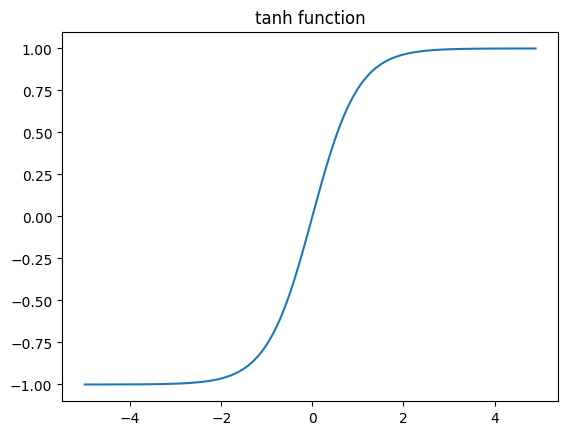

In [95]:
# 绘制特征变量和标签之间的因果关系的函数图像
# RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
plt.plot(x.detach(), y.detach())
plt.title("tanh function")
plt.show()

假设自变量和因变量的导函数表达式关系为: $\text{tanh}'(x) = 1 - \text{tanh}^2(x)$

In [96]:
y.sum().backward()

Text(0.5, 1.0, 'tanh derivative function')

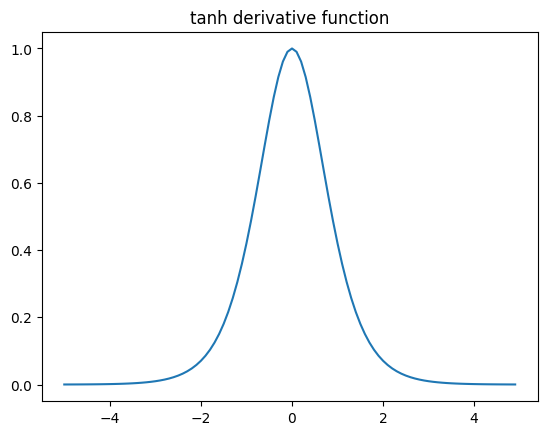

In [97]:
plt.plot(x.detach(), x.grad.detach())
plt.title("tanh derivative function")
plt.show()

In [109]:
# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetTanh4(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True):
        super(GeoffNetTanh4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第一层-> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第二层-> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第三层-> 隐藏层第四层
        # 1.整合信息
        z_hat = self.hidden4_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.tanh(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_tanh4 = GeoffNetTanh4()

In [103]:
# 查看训练好的神经网络模型的各层的模型的全部参数: 连接权重, 偏置值
list(net_tanh4.parameters())

[Parameter containing:
 tensor([[-0.0203,  0.5210],
         [-0.6357,  0.1413],
         [-0.6636, -0.0259],
         [ 0.3158, -0.4500]], requires_grad=True),
 Parameter containing:
 tensor([-0.6028,  0.1079,  0.2355,  0.5492], requires_grad=True),
 Parameter containing:
 tensor([[-0.4648,  0.3063, -0.1137, -0.0099],
         [-0.4709,  0.0171,  0.3811,  0.4474],
         [ 0.0778, -0.0740,  0.1583, -0.4058],
         [-0.0494,  0.4836, -0.3729, -0.0043]], requires_grad=True),
 Parameter containing:
 tensor([-0.1998, -0.0896,  0.1128,  0.4652], requires_grad=True),
 Parameter containing:
 tensor([[-0.2662,  0.3886, -0.1422,  0.2079],
         [-0.1341, -0.4663,  0.0752,  0.2452],
         [-0.2460, -0.4465, -0.0785,  0.2762],
         [ 0.2289,  0.3590, -0.0842, -0.4830]], requires_grad=True),
 Parameter containing:
 tensor([-0.4236,  0.0070,  0.2253, -0.1691], requires_grad=True),
 Parameter containing:
 tensor([[-0.1547, -0.1491, -0.4018,  0.2270],
         [-0.1973, -0.2393, -0.32

In [104]:
for layer in list(net_tanh4.modules())[1:]:
    print(layer.weight)

Parameter containing:
tensor([[-0.0203,  0.5210],
        [-0.6357,  0.1413],
        [-0.6636, -0.0259],
        [ 0.3158, -0.4500]], requires_grad=True)
Parameter containing:
tensor([[-0.4648,  0.3063, -0.1137, -0.0099],
        [-0.4709,  0.0171,  0.3811,  0.4474],
        [ 0.0778, -0.0740,  0.1583, -0.4058],
        [-0.0494,  0.4836, -0.3729, -0.0043]], requires_grad=True)
Parameter containing:
tensor([[-0.2662,  0.3886, -0.1422,  0.2079],
        [-0.1341, -0.4663,  0.0752,  0.2452],
        [-0.2460, -0.4465, -0.0785,  0.2762],
        [ 0.2289,  0.3590, -0.0842, -0.4830]], requires_grad=True)
Parameter containing:
tensor([[-0.1547, -0.1491, -0.4018,  0.2270],
        [-0.1973, -0.2393, -0.3285,  0.3967],
        [-0.2292,  0.0139,  0.2292, -0.2969],
        [-0.1017, -0.2412, -0.2564, -0.2466]], requires_grad=True)
Parameter containing:
tensor([[-0.4978,  0.0394, -0.1443, -0.4350]], requires_grad=True)


In [106]:
# 训练模型
fit(batched_dataset=dataset_train, n_epochs=5, model=net_tanh4, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_tanh4.parameters(), lr=0.03), task="reg")

In [107]:
for layer in list(net_tanh4.modules())[1:]:
    print(layer.weight)

Parameter containing:
tensor([[-0.2161,  0.9912],
        [-0.9272,  0.1316],
        [-1.7775, -0.2555],
        [ 1.2315, -0.1252]], requires_grad=True)
Parameter containing:
tensor([[-0.1843,  0.2406,  0.2572,  0.2380],
        [ 0.2887, -0.1647,  1.4839,  1.0168],
        [ 0.0748, -0.1499,  0.0942, -0.3398],
        [-0.6177,  0.7486, -1.4836, -0.7279]], requires_grad=True)
Parameter containing:
tensor([[-0.2151,  0.3138, -0.2142,  0.3731],
        [ 0.0389, -0.6912, -0.0091,  0.6335],
        [-0.0394, -0.7946, -0.0720,  0.7153],
        [ 0.0931,  0.5680, -0.0817, -0.6917]], requires_grad=True)
Parameter containing:
tensor([[-0.0686, -0.4557, -0.7805,  0.6666],
        [-0.1050, -0.4312, -0.5201,  0.6093],
        [-0.1688, -0.1659,  0.0015, -0.0905],
        [ 0.0682, -0.5535, -0.6699,  0.1604]], requires_grad=True)
Parameter containing:
tensor([[-1.9162, -1.3094, -0.6463, -1.1744]], requires_grad=True)


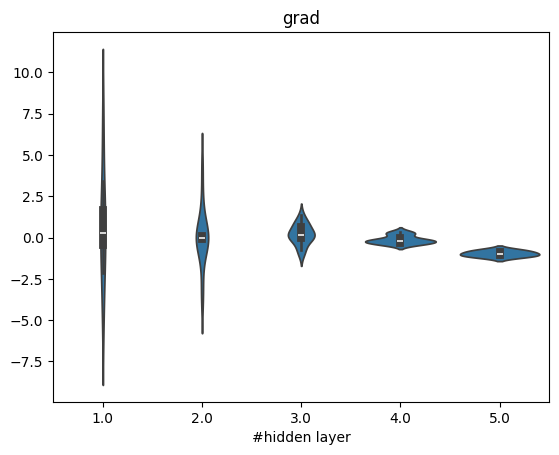

In [108]:
plot_violin_param(model=net_tanh4, param="grad")

In [110]:
# 查看初始化好的神经网络模型的各层的模型的全部参数: 连接权重, 偏置值
list(net_tanh4.parameters())

[Parameter containing:
 tensor([[-0.4265, -0.4529],
         [-0.1461, -0.3388],
         [ 0.1333, -0.2470],
         [ 0.4576,  0.6345]], requires_grad=True),
 Parameter containing:
 tensor([-0.0663, -0.0207,  0.4248,  0.3996], requires_grad=True),
 Parameter containing:
 tensor([[-0.0436, -0.4350,  0.2478, -0.3277],
         [ 0.2305,  0.2339, -0.1874, -0.2870],
         [-0.0676,  0.3849,  0.2208, -0.2949],
         [ 0.2015,  0.4078,  0.4973, -0.0614]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4188,  0.4231, -0.4189, -0.3802], requires_grad=True),
 Parameter containing:
 tensor([[-0.1712, -0.1146, -0.2926,  0.1181],
         [-0.2279,  0.0268, -0.2777, -0.0737],
         [-0.1400,  0.3958, -0.4112,  0.1263],
         [-0.0206, -0.1107,  0.4220,  0.0418]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4611, -0.1585, -0.2470,  0.0817], requires_grad=True),
 Parameter containing:
 tensor([[-0.0601, -0.3627,  0.1301,  0.0543],
         [-0.3963,  0.2332, -0.04

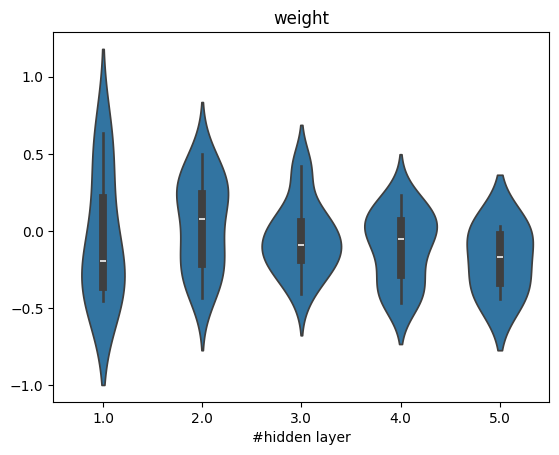

In [111]:
plot_violin_param(model=net_tanh4, param="weight")

In [112]:
# 训练模型
fit(batched_dataset=dataset_train, n_epochs=20, model=net_tanh4, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_tanh4.parameters(), lr=0.03), task="reg")

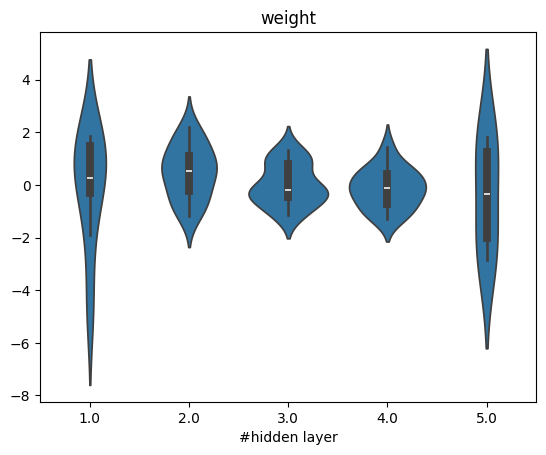

In [113]:
plot_violin_param(model=net_tanh4, param="weight")

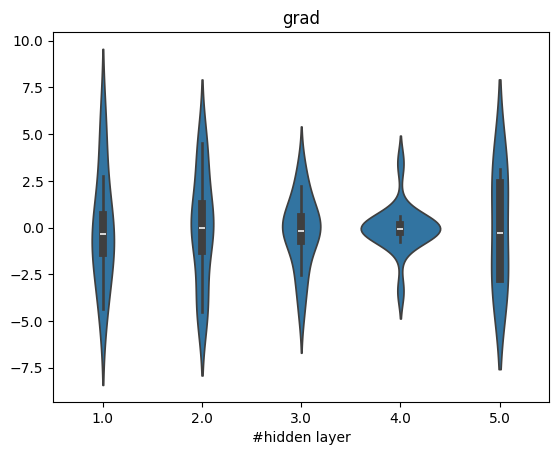

In [114]:
plot_violin_param(model=net_tanh4, param="grad")

##### 搭建深度神经网络模型

In [131]:
torch.manual_seed(55)

# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class Sigmoid_class1_test(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[2], out_features=1, bias=False):
        super(Sigmoid_class1_test, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[0], out_features=out_features, bias=bias)

    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 整合信息
        z_hat = self.hidden1_linear(X)
        # 加工信息
        sigma = torch.sigmoid(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 整合信息
        z_hat = self.output_linear(sigma)
        return z_hat

# 实例化模型
sigmoid_test = Sigmoid_class1_test()

In [132]:
# 获取初始化后的模型的参数
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[0.4748, 0.6191],
         [0.3449, 0.0954]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.5207, -0.0333]], requires_grad=True)]

In [133]:
# 手动将初始化后的模型的参数设置为0
type(list(sigmoid_test.parameters())[0])

torch.nn.parameter.Parameter

In [134]:
list(sigmoid_test.parameters())[0]

Parameter containing:
tensor([[0.4748, 0.6191],
        [0.3449, 0.0954]], requires_grad=True)

In [135]:
type(list(sigmoid_test.parameters())[0].data)

torch.Tensor

In [136]:
list(sigmoid_test.parameters())[0].data.ndim

2

In [137]:
list(sigmoid_test.parameters())[0].data.shape

torch.Size([2, 2])

In [138]:
list(list(sigmoid_test.parameters())[0].data.shape)

[2, 2]

##### 手动将模型的初始化参数全部设置为0

In [139]:
list(sigmoid_test.parameters())[0].data = torch.zeros(size=list(list(sigmoid_test.parameters())[0].data.shape), dtype=torch.float32)
list(sigmoid_test.parameters())[1].data = torch.zeros(size=list(list(sigmoid_test.parameters())[1].data.shape), dtype=torch.float32)

In [128]:
# 获取手动修改后的模型的参数
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[0., 0.],
         [0., 0.]], requires_grad=True),
 Parameter containing:
 tensor([[0., 0.]], requires_grad=True)]

In [129]:
# 训练模型
fit(batched_dataset=dataset_train, n_epochs=5, model=sigmoid_test, criterion=nn.MSELoss(), optimizer=optim.SGD(params=sigmoid_test.parameters(), lr=0.03), task="reg")

In [130]:
# 获取训练后的模型的参数
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[ 0.4705, -0.0227],
         [ 0.4705, -0.0227]], requires_grad=True),
 Parameter containing:
 tensor([[0.8310, 0.8310]], requires_grad=True)]

In [140]:
# 训练模型
fit(batched_dataset=dataset_train, n_epochs=20, model=sigmoid_test, criterion=nn.MSELoss(), optimizer=optim.SGD(params=sigmoid_test.parameters(), lr=0.03), task="reg")

In [141]:
# 获取训练后的模型的参数
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[ 0.5349, -0.1147],
         [ 0.5349, -0.1147]], requires_grad=True),
 Parameter containing:
 tensor([[1.0104, 1.0104]], requires_grad=True)]

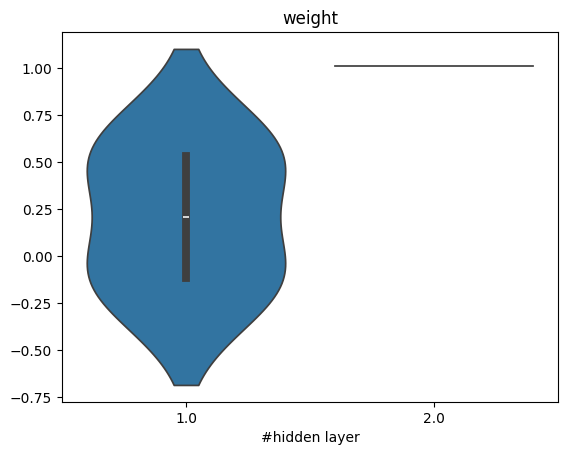

In [142]:
plot_violin_param(model=sigmoid_test, param="weight")

In [150]:
# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

In [145]:
# 设置随机数发生器的随机数种子
torch.manual_seed(55)

# 实例化模型
relu_model3 = GeoffNetReLU3(bias=False)

# 训练模型
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=relu_model3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=relu_model3.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

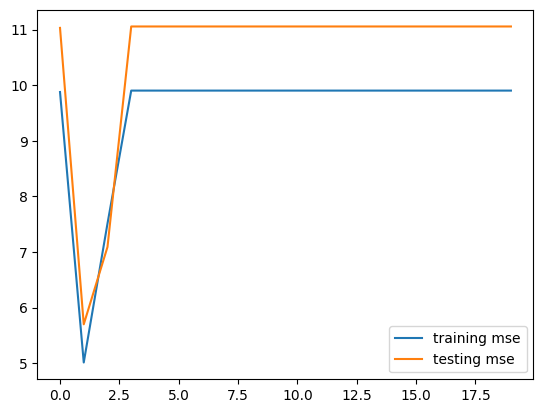

In [147]:
# 绘制训练完成的模型在训练数据集和测试数据集上的模型评估性能指标的变化情况
plt.plot(list(range(20)), losses_train, label="training mse")
plt.plot(list(range(20)), losses_test, label="testing mse")
plt.legend(loc="lower right")
plt.show()

In [151]:
# 设置 另外一个 随机数发生器的随机数种子
torch.manual_seed(1998)

# 实例化模型
relu_model3 = GeoffNetReLU3(bias=False)

# 训练模型
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=relu_model3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=relu_model3.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

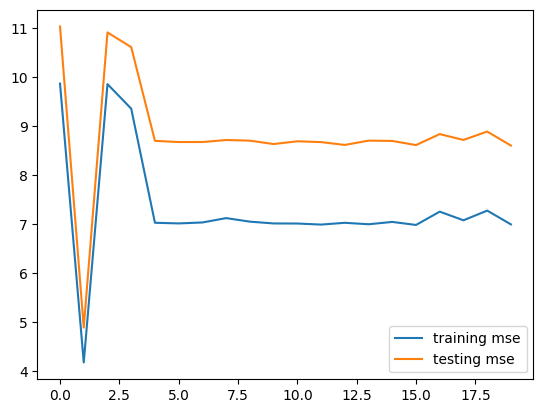

In [152]:
# 绘制训练完成的模型在训练数据集和测试数据集上的模型评估性能指标的变化情况
plt.plot(list(range(20)), losses_train, label="training mse")
plt.plot(list(range(20)), losses_test, label="testing mse")
plt.legend(loc="lower right")
plt.show()